<a href="https://colab.research.google.com/github/b-paramesh/Logistic_Regression_Decision_Tree_Random_Forest/blob/main/Day_19_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predictions: [1 0]
Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



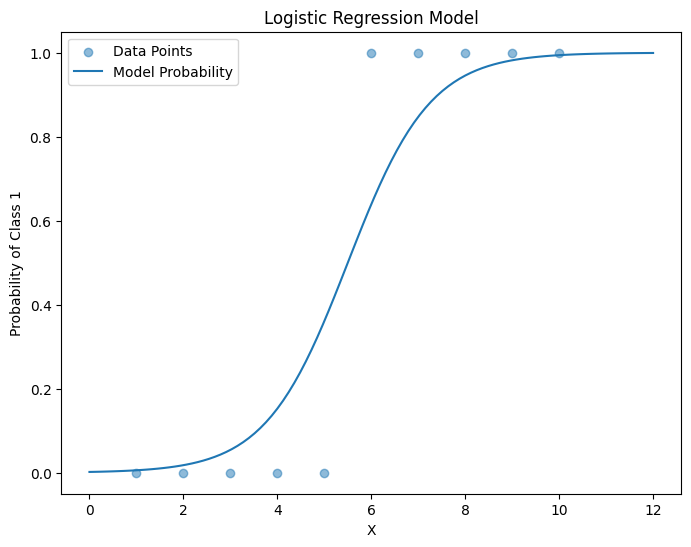

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# ------------------ DATA ------------------
X = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
y = np.array([0,0,0,0,0,1,1,1,1,1])

# ------------------ TRAIN-TEST SPLIT ------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------ MODEL ------------------
model = LogisticRegression()
model.fit(X_train, y_train)

# ------------------ PREDICTIONS ------------------
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

# ------------------ ACCURACY ------------------
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# ------------------ CLASSIFICATION REPORT ------------------
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ------------------ PROBABILITY CURVE ------------------
X_range = np.linspace(0, 12, 100).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]

# ------------------ PLOT ------------------
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data Points', alpha=0.5)
plt.plot(X_range, y_prob, label='Model Probability')
plt.xlabel('X')
plt.ylabel('Probability of Class 1')
plt.title('Logistic Regression Model')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[1 0]
 [0 1]]


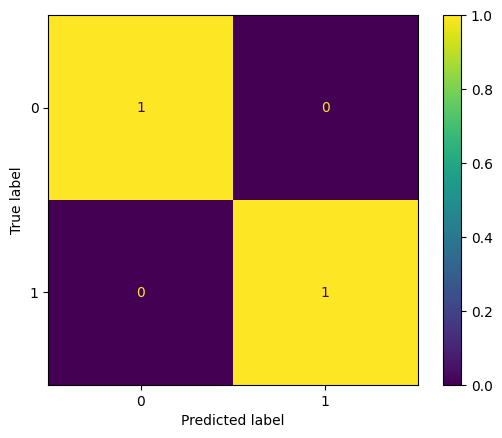

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205


Confusion Matrix:
[[70 30]
 [ 9 96]]


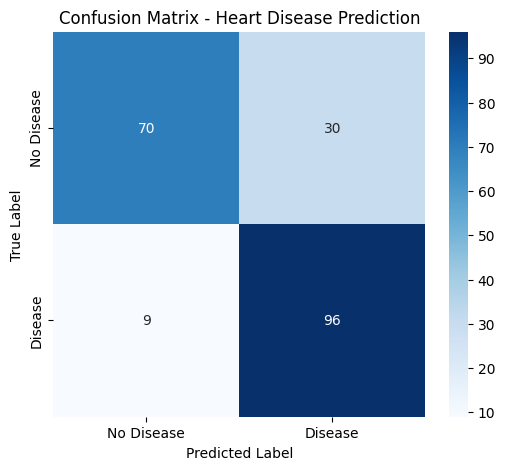

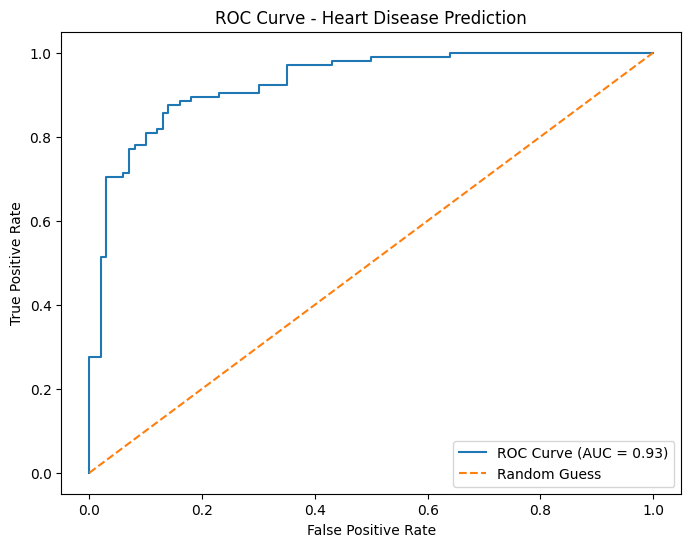

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.preprocessing import StandardScaler

# ------------------ LOAD DATA ------------------
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
path="/content/drive/MyDrive/Colab Notebooks/heart.csv"
df=pd.read_csv(path)


# ------------------ FEATURES & TARGET ------------------
X = df.drop("target", axis=1)
y = df["target"]

# ------------------ TRAIN-TEST SPLIT ------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------ FEATURE SCALING ------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ------------------ MODEL ------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ------------------ PREDICTIONS ------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# ------------------ ACCURACY ------------------
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# ------------------ CLASSIFICATION REPORT ------------------
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ------------------ CONFUSION MATRIX ------------------
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ------------------ CONFUSION MATRIX HEATMAP ------------------
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Disease", "Disease"],
    yticklabels=["No Disease", "Disease"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Heart Disease Prediction")
plt.show()

# ------------------ ROC CURVE ------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Heart Disease Prediction")
plt.legend()
plt.show()
